# Imports 

In [3]:
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from time import perf_counter
import numpy as np
import random
import matplotlib.pyplot as plt

# Mnist dataset Load

Load Mnist

In [4]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

Scale down pixel values from [0,255] to [0,1]

In [7]:
X /= 255.0

Split sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
def plot_example(X, Y, n_examples = 3):
    """Plot random n_examples from training set"""
    instances = random.sample(range(0, X.shape[0] - 1), n_examples)
    for i, random_instance in enumerate(instances):
        img = X[random_instance].reshape(28, 28)
        y = Y[random_instance]
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

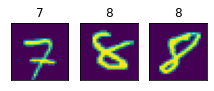

In [10]:
plot_example(X_train, y_train)

In [11]:
X_train.shape

(52500, 784)

# Conventional Training

In [16]:
def simple_model():

    inp = tf.keras.Input((784,))

    x = tf.keras.layers.Dense(16, activation='relu')(inp)
    x = tf.keras.layers.Dropout(0.05)(x)
    out = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(
        inputs=inp,
        outputs=out,
    )

    return model

In [17]:
model = simple_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
              )

fit_params = {'batch_size': 256, 'epochs': 15, 'verbose': 1}

2022-09-03 18:19:51.641783: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
tic = perf_counter()
model.fit(X_train, y_train, **fit_params)
training_time = perf_counter() - tic

Epoch 1/15
206/206 [==============================] - 2s 7ms/step - loss: 0.9641 - sparse_categorical_accuracy: 0.7157
Epoch 2/15
206/206 [==============================] - 1s 5ms/step - loss: 0.4399 - sparse_categorical_accuracy: 0.8738
Epoch 3/15
206/206 [==============================] - 1s 6ms/step - loss: 0.3710 - sparse_categorical_accuracy: 0.8912
Epoch 4/15
206/206 [==============================] - 1s 6ms/step - loss: 0.3389 - sparse_categorical_accuracy: 0.8994
Epoch 5/15
206/206 [==============================] - 1s 6ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.9058
Epoch 6/15
206/206 [==============================] - 1s 6ms/step - loss: 0.3006 - sparse_categorical_accuracy: 0.9103
Epoch 7/15
206/206 [==============================] - 1s 6ms/step - loss: 0.2919 - sparse_categorical_accuracy: 0.9129
Epoch 8/15
206/206 [==============================] - 1s 6ms/step - loss: 0.2809 - sparse_categorical_accuracy: 0.9157
Epoch 9/15
206/206 [============================

In [19]:
print(f'Total training time: {training_time} secs')

Total training time: 19.2863533499999 secs


In [20]:
predictions = np.argmax(model.predict(X_test), axis=1)

547/547 [==============================] - 2s 4ms/step


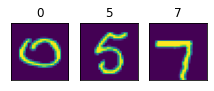

In [21]:
plot_example(X_test, predictions)